## Importing all the necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from matplotlib.ticker import *

# helps in visualizing all the graphs within the notebook
% matplotlib inline

## Changing the directory to the folder where data is stored

In [2]:
#os.chdir('....../Kaggle/Bike Sharing')
#os.chdir('C:/Users/Taha/Documents/OneDrive - DePaul University/Kaggle/Bike Sharing')

In [4]:
### Loading the data using pandas ####
#parse_dates helps in loading datetime column as a datetime object 

train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv('test.csv', parse_dates=['datetime'])

In [6]:
# shows the first five observations of the training set 
## Python uses a 0 based indexing, which is why the first observation is 0 instead of 1 and the last one is 4 instead of 5
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
# Shape of the dataframes
print train.shape
print test.shape

(10886, 12)
(6493, 9)


#### Based on the shape, we can see that the training set has three more columns than the testing set
#### Casual, Registered are two additional columns whereas the 'count' is the dependent variable in the training set

In [8]:
# Data Type Objects of each column in the training set
train.dtypes

# Over here, we can see that the first column datetime is a datetime64 type object (due to the parse_dates parameter) 

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [9]:
# Data Type Objects of each column in the testing set
test.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object

### Removing the columns that are not present in the testing set

In [10]:
# Assigning the dependent variable
train_count = train.count
col_to_drop = ['casual', 'registered']
train.drop(col_to_drop,inplace=True,axis=1)
print train.shape

(10886, 10)


In [11]:
# Converting the following columns in to categorical variables
col_object = ['season', 'holiday', 'weather', 'workingday']
for col in col_object:
    train[col] = train[col].astype(object)
    test[col] = test[col].astype(object)
    
print train.dtypes
print test.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
dtype: object
datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
dtype: object


# Basic Statistics

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000


### Visualizing the Frequency of Seasons 
How many observations do we have for each season?

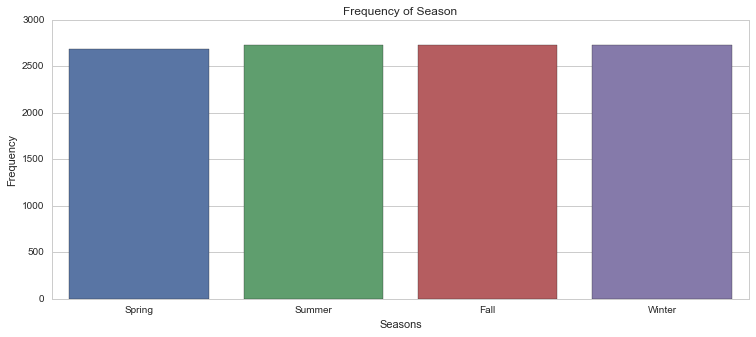

In [14]:
plt.rcParams['figure.figsize'] = 12.5, 5
ax = sns.countplot(x="season", data=train)
plt.title('Frequency of Season')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
labels = ['Spring','Summer', 'Fall', 'Winter']
ax.set_xticklabels(labels)

### Visualizing the Frequency of Weather 
How many observations do we have for each weather?

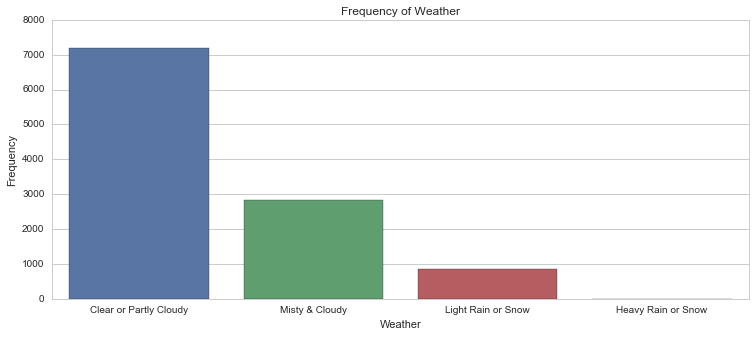

In [15]:
plt.rcParams['figure.figsize'] = 12.5, 5
ax = sns.countplot(x="weather", data=train)
plt.title('Frequency of Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
labels = ['Clear or Partly Cloudy','Misty & Cloudy', 'Light Rain or Snow', 'Heavy Rain or Snow']
ax.set_xticklabels(labels)

### Visualizing the Distribution of Holidays 

[<matplotlib.text.Text at 0xac6c588>, <matplotlib.text.Text at 0xb154860>]

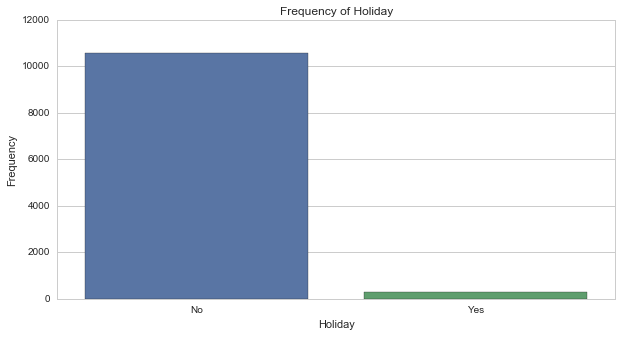

In [13]:
plt.rcParams['figure.figsize'] = 10, 5
ax = sns.countplot(x="holiday", data=train)
plt.title('Frequency of Holiday')
plt.xlabel('Holiday')
plt.ylabel('Frequency')
labels = ['No', 'Yes']
ax.set_xticklabels(labels)

### Visualizing the Distribution of Working Days - An Alternate for the Visualization above 

[<matplotlib.text.Text at 0xb218c50>, <matplotlib.text.Text at 0xb23c5f8>]

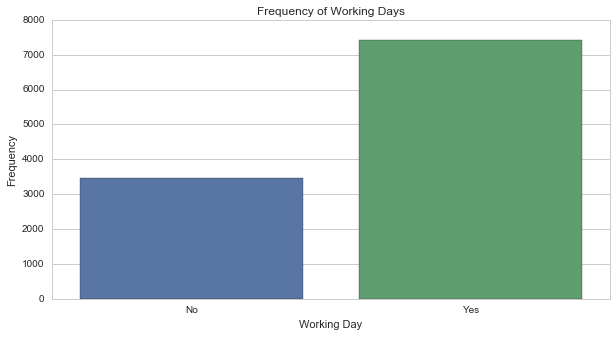

In [14]:
plt.rcParams['figure.figsize'] = 10, 5
ax = sns.countplot(x="workingday", data=train)
plt.title('Frequency of Working Days')
plt.xlabel('Working Day')
plt.ylabel('Frequency')
labels = ['No', 'Yes']
ax.set_xticklabels(labels)

### Visualizing the Distribution of Temperature in Celcius 

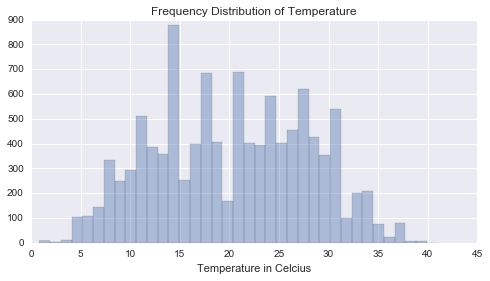

In [15]:
sns.set(rc={"figure.figsize": (8, 4)})
x = train.temp
ax = sns.distplot(x, hist= True, kde = False)
plt.xlabel('Temperature in Celcius')
plt.title('Frequency Distribution of Temperature')

Another version 
Notice y axis, this uses values from 0 - 0.08 as this is a distance plot rather than a frequency distribution 

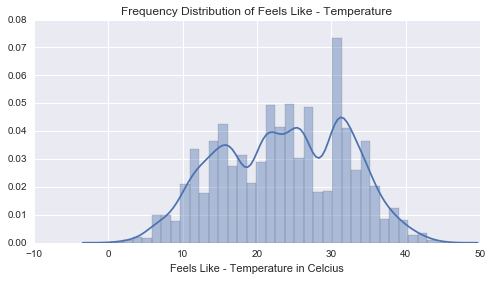

In [16]:
sns.set(rc={"figure.figsize": (8, 4)})
x = train.atemp
ax = sns.distplot(x, hist= True)
plt.xlabel('Feels Like - Temperature in Celcius')
plt.title('Frequency Distribution of Feels Like - Temperature')

### Visualizing the Distribution of Humidity 

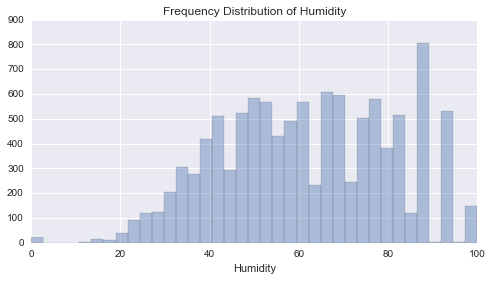

In [17]:
sns.set(rc={"figure.figsize": (8, 4)})
x = train.humidity
ax = sns.distplot(x, hist= True, kde = False)
plt.xlabel('Humidity')
plt.title('Frequency Distribution of Humidity')

### Visualizing the Distribution of Windspeed

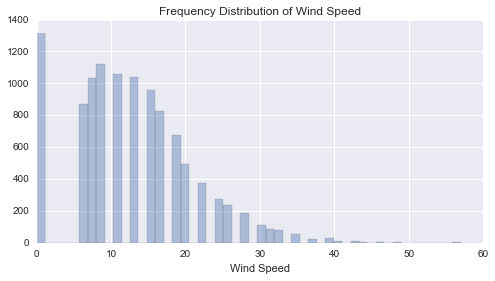

In [18]:
sns.set(rc={"figure.figsize": (8, 4)})
x = train.windspeed
ax = sns.distplot(x, kde = False)
plt.xlabel('Wind Speed')
plt.title('Frequency Distribution of Wind Speed')

### Using Box Plot to visualize the distribution of the weathers within the data

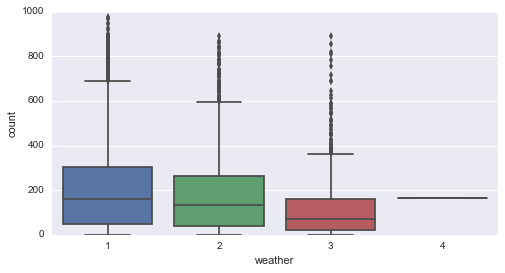

In [19]:
sns.boxplot(x="weather", y="count", data=train)

### Visualizing the total number of rental for each hour during the day

In [34]:
# Creating a new column which represents the hour of the day
train['time_hour'] = train.datetime.apply(lambda x: x.hour)

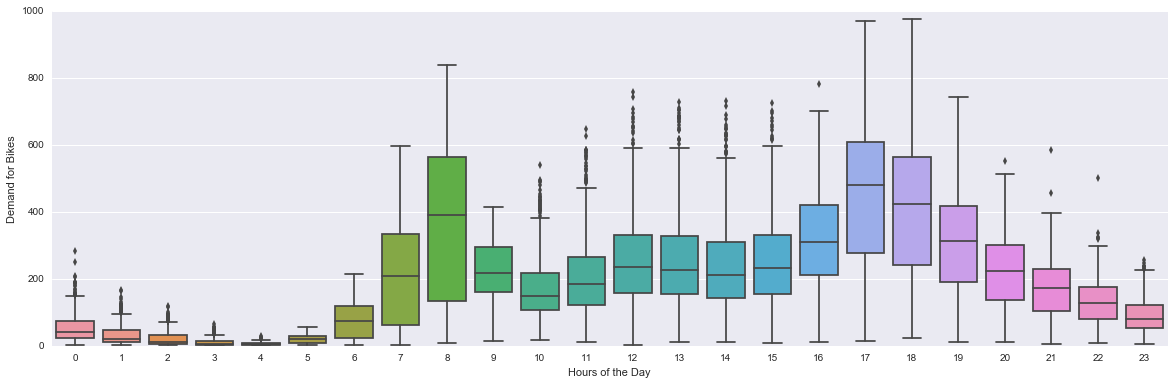

In [35]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.boxplot(x="time_hour", y="count", data=train)
plt.xlabel('Hours of the Day')
plt.ylabel('Demand for Bikes')

#### We can see that the highest number of rentals occur during the rush hour, for instance 7 am, 8 am, 5 pm and 6 pm. However, it can also be seen that people have rented bikes throughout the day, sometimes even during the early hours of the day, which is somewhat unexpected

### Visualizing the total number of rental for each hour during the day

In [36]:
# Creating a new column which represents the day of the week
train['weekday'] = train.datetime.apply(lambda x: x.weekday())

In [37]:
to_change = [0,1,2,3,4,5,6]
new = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
train['alpha_week'] = train['weekday']
train['alpha_week'].replace(to_change, new, inplace = True)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,time_hour,year,temp_cut,weekday,alpha_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,2011,"(0, 15]",5,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,2011,"(0, 15]",5,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,2011,"(0, 15]",5,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,2011,"(0, 15]",5,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,2011,"(0, 15]",5,Sat


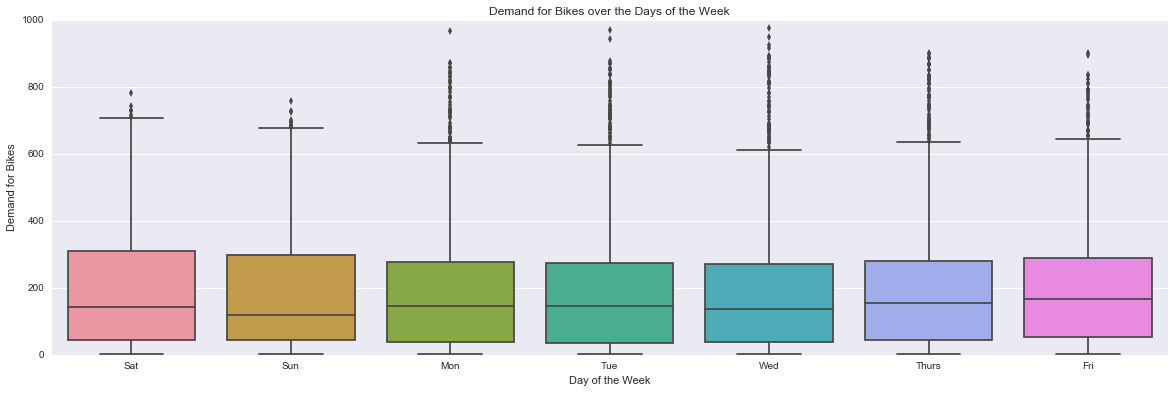

In [38]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.boxplot(x="alpha_week", y="count", data=train)
plt.xlabel('Day of the Week')
plt.ylabel('Demand for Bikes')
plt.title('Demand for Bikes over the Days of the Week')

# Checking for the Correlation among the remaining continous variables

In [39]:
df_cont = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']]
correl = df_cont.corr()
correl

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


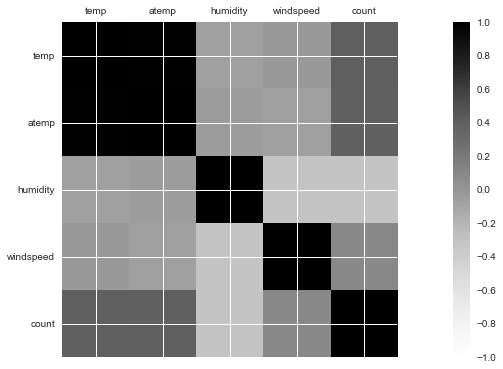

In [40]:
names = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correl, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Visualizing the count of rental on Yearly Basis

In [41]:
train['year'] = train.datetime.apply(lambda x: x.year)

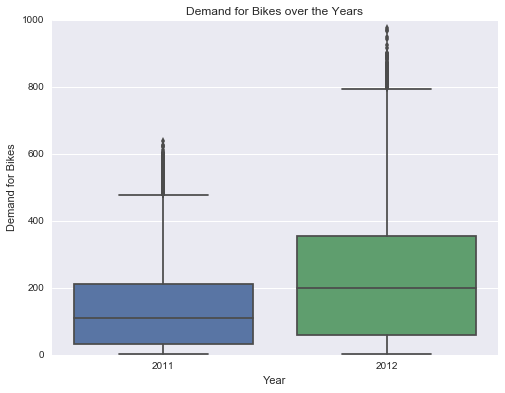

In [42]:
sns.set(rc={"figure.figsize": (8, 6)})
sns.boxplot(x="year", y="count", data=train)
plt.xlabel('Year')
plt.ylabel('Demand for Bikes')
plt.title('Demand for Bikes over the Years')

### Visualizing the count of rental on Monthly Basis

In [43]:
train['month'] = train.datetime.apply(lambda x: x.month)

to_change = [1,2,3,4,5,6,7,8,9,10,11,12]
new = ['Jan', 'Feb', 'Mar', "Apr", 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
train['alpha_mon'] = train['month']
train['alpha_mon'].replace(to_change, new, inplace = True)

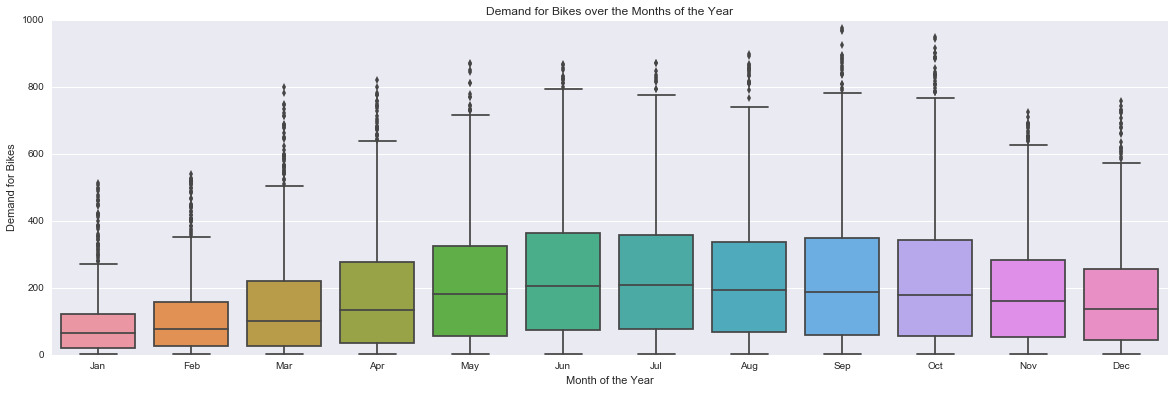

In [44]:
sns.set(rc={"figure.figsize": (20, 6)})
sns.boxplot(x="alpha_mon", y="count", data=train)
plt.xlabel('Month of the Year')
plt.ylabel('Demand for Bikes')
plt.title('Demand for Bikes over the Months of the Year')

### SwarmPlot which shows relationship between Total number of Rentals, Time of the Day and the Overall Weather

[<matplotlib.text.Text at 0xf51dcf8>, <matplotlib.text.Text at 0xf406518>]

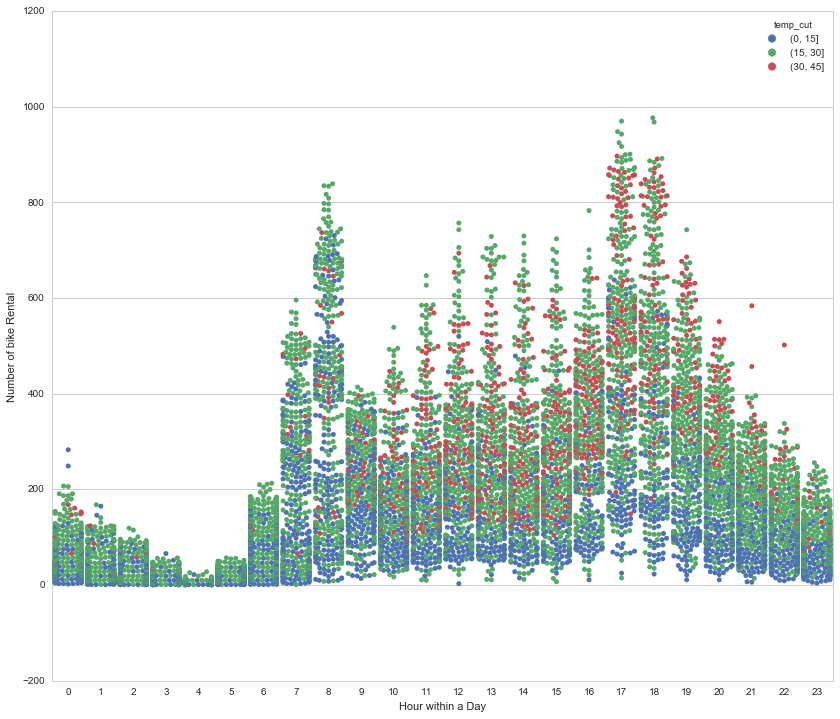

In [31]:
train['temp_cut']=pd.cut(train.temp,[0,15,30,45,])
plt.rcParams['figure.figsize']=(14,12)
plt.rcParams['font.size']=14
sns.set_style("whitegrid")
g=sns.swarmplot(x='time_hour',y='count',hue='temp_cut',data=train)
g.set(xlabel="Hour within a Day", ylabel="Number of bike Rental")

## Analysis

In [45]:
feature_cols = ['season' , 'workingday', 'weather' ,'temp' ,'atemp', 'humidity', 'windspeed', 'time_hour', 'weekday', 'year', 'month']

mat = np.matrix(train[feature_cols])
target = (np.array(train['count'])).T

print mat.shape
print (target.shape)


(10886L, 11L)
(10886L,)


In [46]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(mat, target, test_size=0.3, random_state=33)

print X_train.shape
print X_test.shape

(7620L, 11L)
(3266L, 11L)


In [48]:
print Y_test.shape
print Y_train.shape

(3266L,)
(7620L,)


In [49]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(X_train)
# Now we can constuct a vector of errors
err = abs(p-Y_train)

# Let's see the error on the first 10 predictions
print err[:10]

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print rmse_train

[  85.46944465   97.61040131   35.98058658   62.22902063  151.42803184
  440.95516479   65.73248473  110.11373909  103.04879485    1.95798014]
141.706962975


In [50]:
from sklearn.cross_validation import KFold
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(mat), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(mat[train],target[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(mat[test])
    e = p-target[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(mat))

method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 141.7070
RMSE on 10-fold CV: 143.7043


### Identifying Variables that are important For our Model & Visualizing it


Correlation coefficients:

[[ 1.          0.97479351]
 [ 0.97479351  1.        ]]

Feature importances:

[ 0.02557438  0.07810151  0.01974412  0.06347116  0.06223341  0.04073247
  0.01029836  0.57011374  0.01996549  0.08086062  0.02890474]


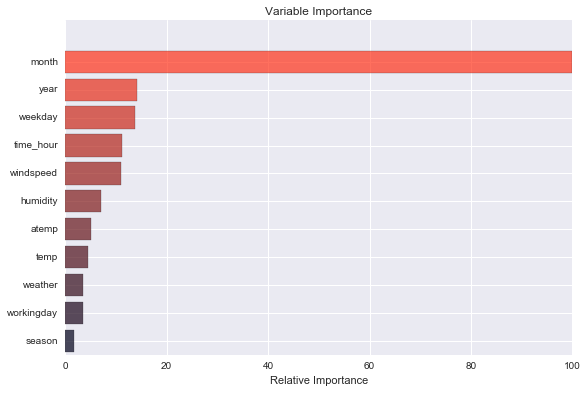

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
params = {'n_estimators': 50, 'random_state': np.random.RandomState(1)}

clf = ExtraTreesRegressor(**params)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print('\nCorrelation coefficients:\n')
print(np.corrcoef(y_pred, Y_test))
print('\nFeature importances:\n')
print(clf.feature_importances_ )

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)


# Set color transparency (0: transparent; 1 solid)
a = 0.7
# Create a colormap
customcmap = [(x/10.0,  x/50.0, 0.1) for x in range(len(clf.feature_importances_))]
plt.barh(pos, feature_importance[sorted_idx], align='center',  alpha=a, color=customcmap)
plt.yticks(pos, feature_cols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()